[0.625  0.     0.     0.     0.125  0.     0.     0.     0.125  0.
 0.     0.     0.0625 0.     0.     0.0625 0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.    ]


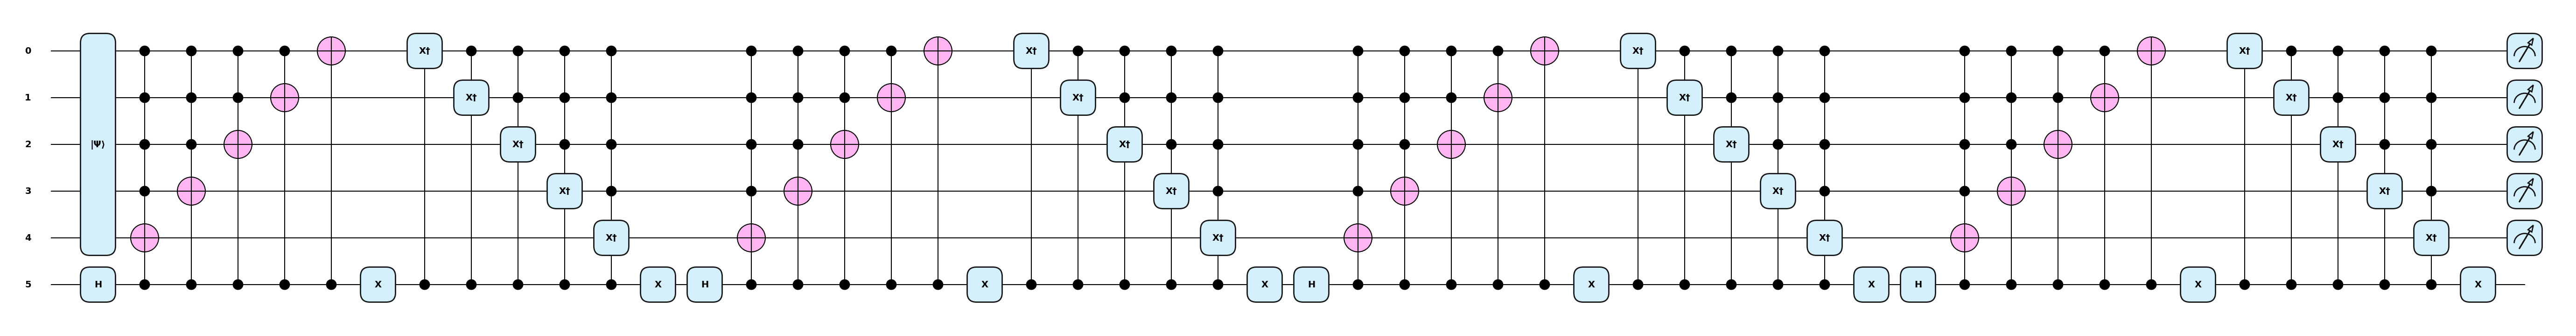

In [42]:
import time
import pennylane as qml

SIZE = 5 # position space
start_time = time.time()
s = SIZE
wires_x = list(range(s)) #[0,1,2,3,4,5]
coin = [s] # coin space

def shift_op():
     for index in range(len(wires_x)-1, 0, -1):
         control_values = [1] * index
         qml.ctrl(qml.PauliX, control=wires_x[:index], control_values=control_values)(wires=wires_x[index])
     qml.PauliX(wires_x[0])


@qml.qnode(qml.device("lightning.qubit", wires=(wires_x + coin)))
def circuit(steps, state):
     state_val = list(map(int, f"{state:0{s}b}"))
     qml.BasisState(state_val, wires=wires_x)
     for i in range(steps): 
        qml.H(coin)
        qml.ctrl(shift_op, control=coin)()
        qml.ctrl(qml.adjoint(shift_op), control=coin, control_values=[0])()
     return qml.probs(wires=wires_x)

steps = 4
state = 2 ** (steps - 1)
print(circuit(steps, state))
_ = qml.draw_mpl(circuit, style="pennylane")(steps, state)
